## Câble sous-marin


# Questions théoriques


# Application

In [1]:
#Chargement des dépendances
import numpy as np
import math
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101
Delta=(B-A)/(N-1)
discretization_indexes=np.arange(N)
discretization= discretization_indexes*Delta

#Paramètres du modèle
mu=-5
a=50
sigma2=12

#Données
observation_indexes=[0,20,40,60,80,100]
depth = np.array([0,-4,-12.8,-1,-6.5,0])

#Indices des composantes correspondant aux observations et aux componsantes non observées

unknown_indexes=list(set(discretization_indexes)-set(observation_indexes))




In [2]:
def Cov(h, a, sigma2) :
    return sigma2 * np.exp(-np.abs(h)/a)


In [3]:
mat_dist= np.zeros((N, N))
for i in range(N) : 
    for j in range(N) : 
        mat_dist[i][j] = np.abs(discretization[i]-discretization[j])
print(mat_dist)
        

[[  0.   5.  10. ... 490. 495. 500.]
 [  5.   0.   5. ... 485. 490. 495.]
 [ 10.   5.   0. ... 480. 485. 490.]
 ...
 [490. 485. 480. ...   0.   5.  10.]
 [495. 490. 485. ...   5.   0.   5.]
 [500. 495. 490. ...  10.   5.   0.]]


In [4]:
covar_Z = Cov(mat_dist, a, sigma2)
print(covar_Z, np.shape(covar_Z))

[[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 6.65419193e-04
  6.02096185e-04 5.44799157e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 7.35401941e-04
  6.65419193e-04 6.02096185e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 ...
 [6.65419193e-04 7.35401941e-04 8.12744838e-04 ... 1.20000000e+01
  1.08580490e+01 9.82476904e+00]
 [6.02096185e-04 6.65419193e-04 7.35401941e-04 ... 1.08580490e+01
  1.20000000e+01 1.08580490e+01]
 [5.44799157e-04 6.02096185e-04 6.65419193e-04 ... 9.82476904e+00
  1.08580490e+01 1.20000000e+01]] (101, 101)


In [9]:
#Initialisation

l=len(observation_indexes)
covar_obs=np.zeros((l,l))
covar_obs_inconnu=np.zeros((N-l,l))
covar_inconnu=np.zeros((N-l,N-l))

#Calcul

for i in range(l):
    for j in range(l):
        covar_obs[i][j]=covar_Z[observation_indexes[i]][observation_indexes[j]]

for i in range(N-l):
    for j in range(l):
        covar_obs_inconnu[i][j]=covar_Z[unknown_indexes[i]][observation_indexes[j]]
        
for i in range(N-l):
    for j in range(N-l):
        covar_inconnu[i][j]=covar_Z[unknown_indexes[i]][unknown_indexes[j]]

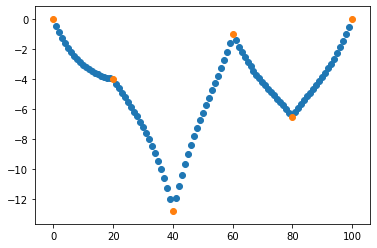

In [10]:
# En utilisant la formule de la question 2 de la partie I
# d'abord, il faut inverser la matrice cov_obs
covar_obs_inv=np.linalg.inv(covar_obs)

#on initialise nos deux vecteurs avec les valeurs de la moyenne
a = np.full(N-l,mu)  
b= np.full(l,mu)

#avec la formule du cours

esp_cond = a + np.dot(np.dot(covar_obs_inconnu,covar_obs_inv),(depth-b))

# réprésentation

plt.scatter(unknown_indexes, esp_cond)
plt.scatter(observation_indexes, depth)

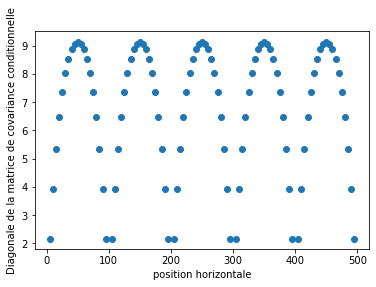

In [12]:
covar_conditionnelle = covar_inconnu-np.matmul(np.matmul(covar_obs_inconnu,covar_obs_inv),np.transpose(covar_obs_inconnu))
Liste=[]
for i in range(N-l):
    Liste.append(covar_conditionnelle[i][i])
plt.scatter(np.asarray(unknown_indexes)*5,Liste)
plt.ylabel("Diagonale de la matrice de covariance conditionnelle")
plt.xlabel("position horizontale")
plt.show()


In [ ]:
def long (pas_dis, vect_depth) :
    L=0
    for i in range(len(vect_prof)-1) : 
        L= L+ np.sqrt(pas_dis**2 + (vect_depth[i+1]-vect_depth[i])**2)
    return L
        

In [ ]:
#Il faut dans un premier temps réaliser 100 simulations à l'aide de la méthode de Box-Muller : une simulattion uniforme nous donnera ainsi une gaussienne. 
def Simulation(n) : 
    U=[random.rand(0,1) for i in range(n)]
    V=[random.rand(0,1) for i in range(n)]
    for i in range(n) : 
    
